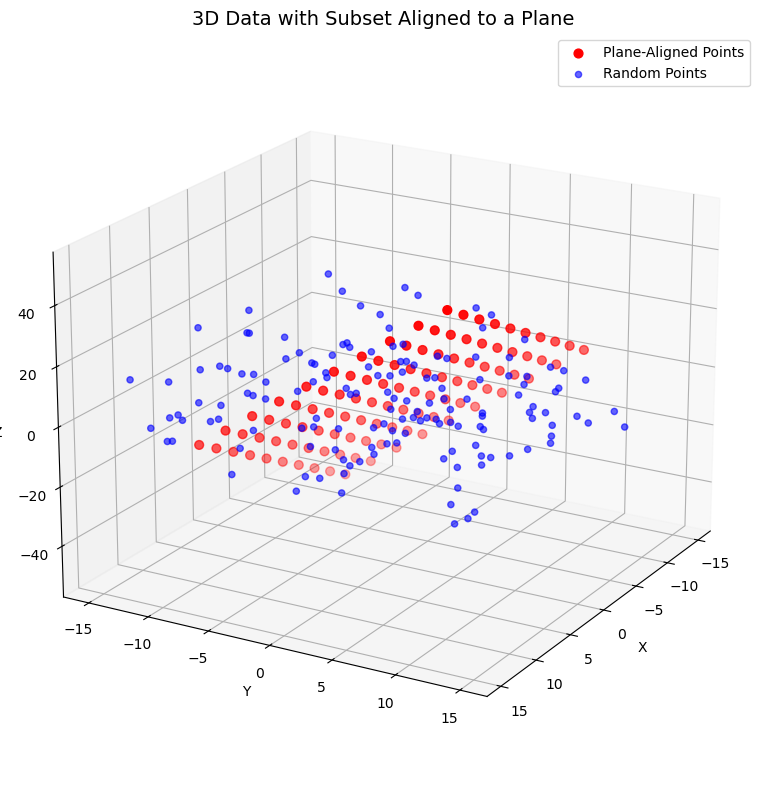

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time 
import sys
import os
sys.path.append(os.path.abspath(".."))
from discover_near_rank_k_submatrix import SamplingAlgorithm

# Generate points closely aligned to a plane
n_aligned = 100
x_vals = np.linspace(-10, 10, int(np.sqrt(n_aligned)))
y_vals = np.linspace(-10, 10, int(np.sqrt(n_aligned)))
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_grid = 2 * x_grid + 3 * y_grid  # Plane equation: z = 2x + 3y
plane_points = np.column_stack((x_grid.ravel(), y_grid.ravel(), z_grid.ravel()))
plane_points += np.random.normal(scale=0.00001, size=plane_points.shape)  # Add noise

# Generate random points not aligned with the plane
n_random = 150
random_points = np.random.uniform(-15, 15, size=(n_random, 3))

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plane-aligned points
ax.scatter(plane_points[:, 0], plane_points[:, 1], plane_points[:, 2], color='red', label='Plane-Aligned Points', s=40)

# Random points
ax.scatter(random_points[:, 0], random_points[:, 1], random_points[:, 2], color='blue', label='Random Points', alpha=0.6)

ax.set_title("3D Data with Subset Aligned to a Plane", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
ax.view_init(elev=20, azim=30)
plt.tight_layout()
plt.show()

# Stack plane-aligned points and random points
D = np.vstack((plane_points, random_points))

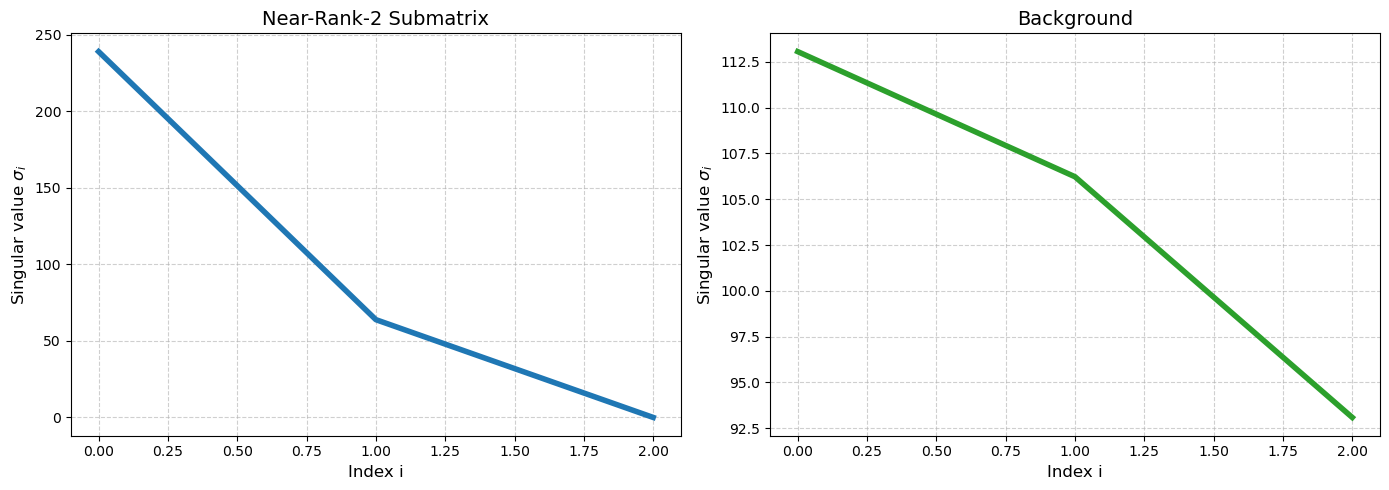

In [39]:
u,s,v = np.linalg.svd( plane_points )
u_random,s_random,v_random = np.linalg.svd( random_points )


# Create figure and two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=100)

# First plot
ax1.plot(s, color='tab:blue', linewidth=4)
ax1.set_title("Near-Rank-2 Submatrix", fontsize=14)
ax1.set_xlabel("Index i", fontsize=12)
ax1.set_ylabel(r"Singular value $\sigma_i$", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Second plot
ax2.plot(s_random, color='tab:green', linewidth=4)
ax2.set_title("Background", fontsize=14)
ax2.set_xlabel("Index i", fontsize=12)
ax2.set_ylabel(r"Singular value $\sigma_i$", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()



In [40]:
# Run SampleAndExpand with default parameters 
delta = 0.05 # tolerance 
delta_rectangle = 1e-10
SaE_ranktwo = SamplingAlgorithm(D, k = 2, delta=delta, delta_rectangle=delta_rectangle, 
approximate_biclique = False, sparsity_constraint = False)
start_time = time.time() 
output =  SaE_ranktwo.run_multiple(N_rep = 3)
output_submatrix_approximation = output[0]
end_time = time.time() - start_time 
print(f"The output submatrix has dimensions {output[0].shape}")
print(f"Time elapsed {end_time}")

The output submatrix has dimensions (100, 3)
Time elapsed 1.5133185386657715


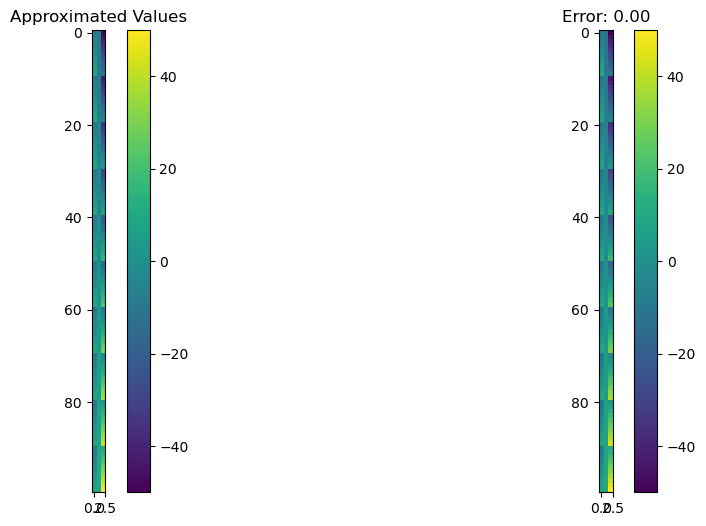

In [41]:
best_indices = output[2] # Discovered Submatrix Rank-2 Approximation 
best_D_sub = D[np.ix_(best_indices[0], best_indices[1])] # Discovered Submatrix Original Values
best_error = output[1]
SaE_ranktwo.plot_approximation(output_submatrix_approximation, best_D_sub, best_error) 